<h2>Diffusion problem</h2>


\begin{align*}
    - \nabla \cdot (A(x, \omega_1) \cdot \nabla u(x, \omega)) &= 1 \hspace{0.2cm} \text{on} \hspace{0.2cm} D(\omega_2) \\
    u(x, \omega) & = 0 \hspace{0.2cm} \text{on} \hspace{0.2cm} \delta D(\omega_2)
\end{align*}
where $A(x, \omega_1) = \exp(Z(x, \omega_1))$, $Z$ being gaussian  \
and $V(x, \omega_2)$ is the random field corresponding to $D(\omega_2)$

In [1]:
from helpers_diffusion import *

In [ ]:
# Create random field V for plotting
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(10)
randomFieldZ = z_calculate_random_field_eigenpairs(10, z_cov)

KeyboardInterrupt: 

In [ ]:
# Sample the random field
xi_v = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldV.J)
xi_z = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldZ.J)

In [ ]:
"""
Solve diffusion equation for a sample and plot the solution û on the reference domain.
Creation of the image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_u_hat.png
"""

u_sol = solve_diffusion_poisson_for_given_sample(10, RHS_F, randomFieldV, jacobianV, randomFieldZ, xi_v, xi_z)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]
u_sols = []

for i in range(len(x_coords)):
    u_sols.append(u_sol(x_coords[i], y_coords[i]))

grid_z = griddata((x_coords, y_coords), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
plt.title(r'$\hat{u}(\hat{x}, \omega)$ on $D_{ref}$', fontsize=24, pad=20)
plt.xlabel(r'$\hat{x}_1$', fontsize=24)
plt.ylabel(r'$\hat{x}_2$', fontsize=24)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""
Solve diffusion equation for a sample and plot the solution u on the sample domain.
Creation of the image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_u.png
"""

u_sol = solve_diffusion_poisson_for_given_sample(10, RHS_F, randomFieldV, jacobianV, randomFieldZ, xi_v, xi_z)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1.5:1.5:500j, -1.5:1.5:500j]
u_sols = []
x_coords_perturbed = []
y_coords_perturbed = []

for i in range(len(x_coords)):
    P_hat = fe.Point(x_coords[i], y_coords[i])
    x_coords_perturbed.append(randomFieldV(P_hat, xi_v)[0])
    y_coords_perturbed.append(randomFieldV(P_hat, xi_v)[1])
    u_sols.append(u_sol(P_hat))


grid_z = griddata((x_coords_perturbed, y_coords_perturbed), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([np.min(x_coords_perturbed) - 0.1, np.max(x_coords_perturbed) + 0.1])
ax.set_ylim([np.min(y_coords_perturbed) - 0.1, np.max(y_coords_perturbed) + 0.1])
plt.title(r'$u(x, \omega)$ on $D(\omega)$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
"""
Apply MC Analysis and plot mean/variance approximations and convergence.
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_mean.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_variance.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_mean_convergence.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_variance_convergence.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_l2_error.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_h1_error.png
"""

diffusion_analyse_two_resolutions_from_data_u_hat(resolution_sparse = 10,
                                  resolution_fine = 14,
                                  P_hat = fe.Point(0.2, 0.2))

/Users/elias/git/Masterthesis/diffusion/helpers_diffusion.py:483: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



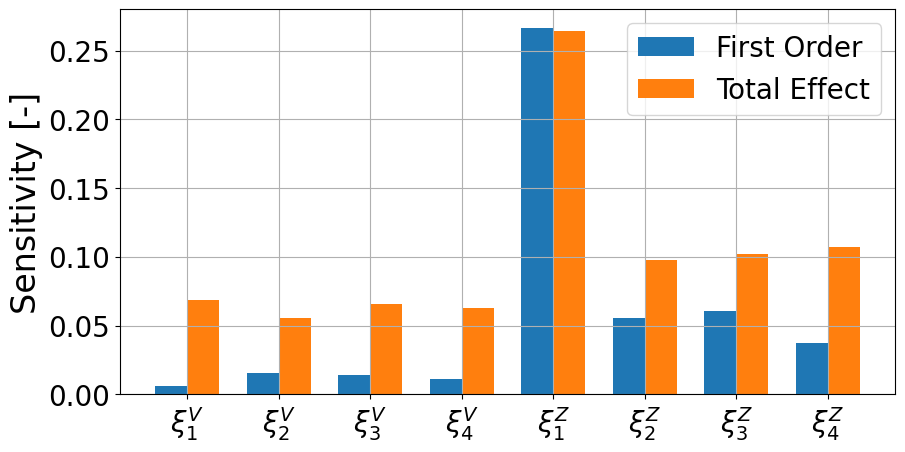

Sample size: 12000


In [ ]:
"""
Plot the Sobol indices for the diffusion model.
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_sobols.png
"""

mesh_res = 8
size_xi_v = 4
size_xi_z = 4
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(mesh_res)

S_single, S_total, mc_sample_size = diffusion_sobol_calc_indices_from_data(fem_res=mesh_res, kl_res=mesh_res,
                                                                         size_xi_v=size_xi_v,
                                                                         size_xi_z=size_xi_z,
                                                                         randomFieldV=randomFieldV, jacobianV=jacobianV)
diffusion_plot_sobols(S_single, S_total, mc_sample_size, size_xi_v)

In [ ]:
# Create random field z for plotting
randomFieldZ = z_calculate_random_field_eigenpairs(10, z_cov)

In [ ]:
"""
Show the random field Z(x, \omega) and A(x, \omega) for a sample.
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_z.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/diffusion_a.png
"""

xi_z = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldZ.J)
rectangular_domain = mshr.Rectangle(fe.Point(-1.5, -1.5), fe.Point(1.5, 1.5))

mesh = mshr.generate_mesh(rectangular_domain, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1.5:1.5:500j, -1.5:1.5:500j]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

z_values = []
for i in range(len(x_coords)):
    z_values.append(randomFieldZ([x_coords[i], y_coords[i]], xi_z))
grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_xlim([-1.6, 1.6])
ax.set_ylim([-1.6, 1.6])
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title(r'$Z(x, \omega_1)$', fontsize=24, pad=20)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

z_values = []
for i in range(len(x_coords)):
    z_values.append(np.exp(randomFieldZ([x_coords[i], y_coords[i]], xi_z)))
grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_xlim([-1.6, 1.6])
ax.set_ylim([-1.6, 1.6])
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title(r'$A(x, \omega_1)$', fontsize=24, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Find out which Eigenvalues are used in sobol calculation

randomFieldZ = z_calculate_random_field_eigenpairs(8, z_cov)
print(f"randomFieldZ.eigenvalues[:4]: {randomFieldZ.eigenvalues[:4]}")

randomFieldV = calculate_vector_field_eigenpairs(8)[0]
print(f"randomFieldV.eigenvalues[:4]: {randomFieldV.eigenvalues[:4]}")